In [68]:
import random
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [ ]:
def std(L):
    ''' calculates and returns the standard deviation of a list of numbers'''
    m = sum(L)/len(L)
    v = 0
    for i in L:
        v += (m-i)**2
    s = (v/len(L))**0.5
    return s

def logarithmic(x,a,b):
    return a*np.log(x) + b

def time(P):
    '''returns the time required for our design to run with the ROM("LUT") peripheral 
    time is calculated based on a P signal which is imput as a list of 0s and 1s'''
    s = ""
    for i in P:
        s += str(i)
    return 2 + len(max(s.split("0")))

def time2(N):
    '''returns the time required for our design to run with the 4 input NAND peripheral 
    time is calculated based on size of the the addends (N bits)'''
    x = random.random()//(1/16)
    return N/2 + 1 if x else N

def run_simulation(save_to, runs, plot_logrithmic = False):
    ''' simulates 'runs' runs of adder designs from 1 bit to 128bit adders'''
    ROM_res = [0]
    ROM_std = []
    NAND_res = [0]
    for N in range(1,129):
        ROM_times = []
        NAND_times = []
        for j in range(runs):
            ROM_time = time([int(random.random()//0.5) for _ in range(N)])
            NAND_time = time2(N)
            ROM_times += [ROM_time]
            NAND_times += [NAND_time]
        ROM_res[-1] = sum(ROM_times)/runs
        ROM_res.append(0)
        ROM_std.append(std(ROM_times))
        NAND_res[-1] = sum(NAND_times)/runs
        NAND_res.append(0)
    plt.figure(figsize=(10,6))
    plt.plot(ROM_res[:-1], label = "our design + ROM")
    plt.plot(NAND_res[:-1], label = "our design + NAND")
    plt.plot(ROM_std, label= "std of one level CLA")
    plt.plot([n for n in range(1,129)], label = "tbk")
    plt.plot([8 for _ in range(1,129)], label = "CLA")
    if plot_logrithmic: 
        plt.yscale("log")
    plt.legend()
    plt.xlabel("N bits of adder")
    plt.ylabel("time interms of tbk adder")
    plt.title("design times")
    plt.savefig(save_to)

    return np.array(ROM_res), np.array(NAND_res)

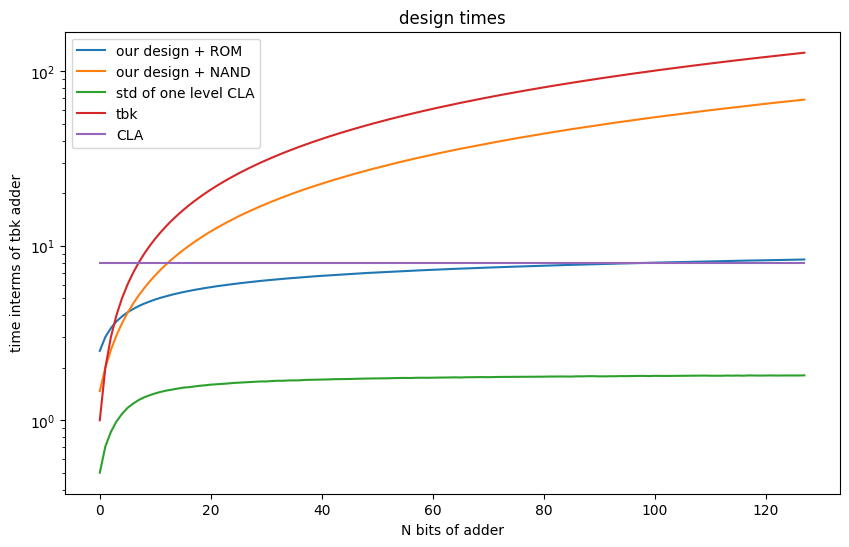

In [70]:
ROM_res, NAND_res = run_simulation("logarithmic_results.png", runs = 1_000_000, plot_logrithmic=True)

In [71]:
curve_fit(logarithmic,[i for i in range(1,129)], ROM_res[:-1])[0]

array([1.33416823, 1.81308359])

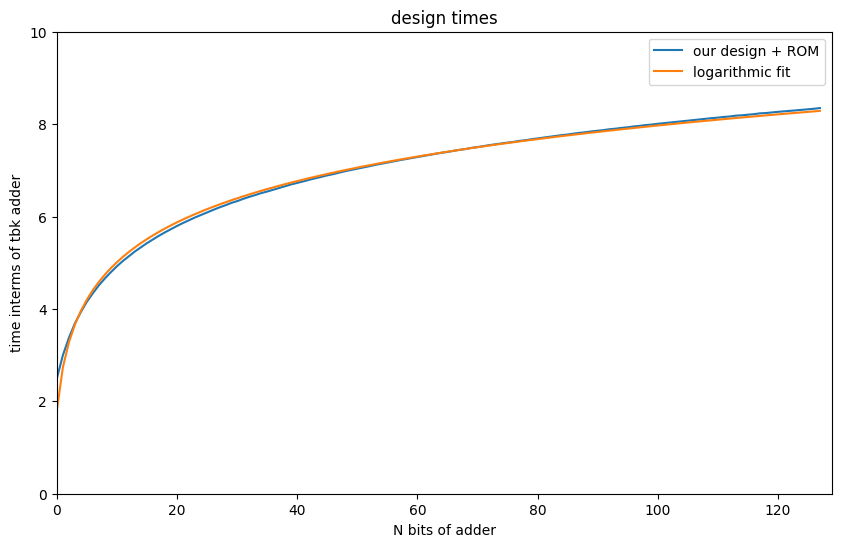

In [82]:
a,b = curve_fit(logarithmic,[i for i in range(1,129)], ROM_res[:-1])[0]
plt.figure(figsize=(10,6))
plt.xlim(0,129)
plt.ylim(0,10)
plt.plot(ROM_res[:-1], label = "our design + ROM")
plt.plot(logarithmic(np.array([i for i in range(1,129)]),a,b), label = "logarithmic fit")
plt.xlabel("N bits of adder")
plt.ylabel("time interms of tbk adder")
plt.title("design times")
plt.legend()
plt.savefig("logarithmic_fit.png")